## Image registration

**Deadline**: Upload this notebook (rename it as 'TP-ImageRegistration-Images-YOUR-SURNAME.ipynb') to E-Campus before the deadline (see E-campus for the exact timing).

**Goal**: The goal of this notebook is to implement the algorithms seen today for pixel-based image registration. Please complete the code where you see **XXXXXXXXXXXXXX**

You will first take two pictures of your right hand into two different positions. Please keep the same topology, ie do not bend or stick together two fingers for instance.

If you can't take the pictures, you can use two pictures of my hand (see below).

In [2]:
if 'google.colab' in str(get_ipython()):
  from google_drive_downloader import GoogleDriveDownloader as gdd
  gdd.download_file_from_google_drive(file_id='1XpgGRo839pBwIhb6h77xoG-NtHEg2DVd',
  dest_path='./Source.jpg')

  from google_drive_downloader import GoogleDriveDownloader as gdd
  gdd.download_file_from_google_drive(file_id='12FKfLjKreAksI3rEcDx4_oEn3qjAzEua',
  dest_path='./Target.jpg')
else:
  print('You are not using Colab. Please define working_dir with the absolute path to the folder where you downloaded the data')

# Please modify working_dir only if you are using your Anaconda (and not Google Colab)
# You should write the absolute path of your working directory with the data
workingDir='./'

We will use the skimage library to read and resize images, you can of course use others (openCV, pillow, scipy, etc.)

In [3]:
from skimage.io import imread
from skimage.transform import resize

import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy as np
import scipy.ndimage

In [4]:
source = imread('/content/Source.jpg')
target = imread('/content/Target.jpg')

The first thing to do is to create a function that creates the transformation matrix T. Please complete the following function following the rules explained in the header of the function.

In [ ]:
print(1+False)

1


In [33]:
def Tmatrix(scale=(1,1), rotationAngle=0, shearAngles=(0,0),translation=(0,0),elation=(0,0),reflection=(False,False)):
    '''
    Transformation matrix defined as the composition of 6 possible geometric
    transformations: Reflection (Re), Rotation (R), Scaling (S), Shear (Sh),
    Translation (T) and Elation (E).
    For the linear transformation part, we assume this composition:
        A = Re * R * S * Sh

    Inputs:
            scale: is a tuple with sx and sy (two scalar values)
            rotationAngle: is an angle in degrees (scalar value)
            shearAngles: is a tuple with the two shear angles in degrees (scalar value)
            translation: is a tuple with tx and ty (scalar values)
            elation: is a tuple containing the elation part (scalar values)
            reflection: is a tuple of Boolean values indicating wheter to reflect with respect to x and y axis

    Output:
            T: the 3x3 transformation matrix (homogeneous coordinates)
    '''

    if len(scale) != 2:
        raise ValueError("scale should be a tuple of length 2")
    if len(shearAngles)!= 2:
        raise ValueError("shearAngles should be a tuple of length 2")
    if len(translation)!= 2:
        raise ValueError("translation should be a tuple of length 2")
    if len(elation)!= 2:
        raise ValueError("elation should be a tuple of length 2")
    if len(reflection)!= 2:
        raise ValueError("reflection should be a tuple of length 2")
    if type(reflection[0])!= bool or type(reflection[1]) != bool:
        raise ValueError("reflection should contain two boolean values")
    if np.ndim(rotationAngle) != 0:
        raise ValueError("rotationAngle should be a scalar")

    # transform angles from degrees to radians
    #     XXXXXXXXXXXXXX
    rotationAngleRad = np.deg2rad(rotationAngle)
    shearAnglesRad = (np.deg2rad(shearAngles[0]),np.deg2rad(shearAngles[1]))

    # compute T
    #     T =XXXXXXXXXXXXXX

    T = np.zeros((3,3))

    # Reflection matrix
    if (reflection[0]):
        if (reflection[1]):
          Re = np.array([[-1,0],\
                         [0,-1]])
        else:
            Re = np.array([[1,0],\
                         [0,-1]])
    else:
      if(reflection[1]):
        Re = np.array([[-1,0],\
                      [0,1]])
      else:
        Re = np.array([[1,0],\
                      [0,1]])

    # Rotation matrix
    R = np.array([[np.cos(rotationAngleRad),-np.sin(rotationAngleRad)],\
                  [np.sin(rotationAngleRad),np.cos(rotationAngleRad)]])

    # Scaling matrix
    S = np.array([[scale[0],0],\
                  [0,scale[1]]])

    # Shear matrix
    Sh = np.array([[1,np.tan(shearAnglesRad[0])],\
                  [np.tan(shearAnglesRad[1]),1]])

    A = Re @ R @ S @ Sh # linear part

    #non linear part
    B = np.array([[0,0,translation[0]],\
                  [0,0,translation[1]],\
                  [elation[0],elation[1],1]])

    T[:2,:2] = A
    T = T + B

    return T

Test here, your function.

In [ ]:
## Define Transformation
T=Tmatrix(scale=(1,1), rotationAngle=40, shearAngles=(0,0),translation=(0,0),elation=(0,0),reflection=(False,False))

In [ ]:
T

array([[ 0.76604444, -0.64278761,  0.        ],
       [ 0.64278761,  0.76604444,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

Next, we need to create a function that apply the previously created transformation matrix. We will need to apply it either to 2D points, seen as a [Nx2] numpy array where N is the number of points, or to image coordinates, modeled as a [2xNxM] Numpy array where N and M are the number of rows and columns of the image respectively.

In [6]:
def applyTransformation(T, points=None, coords=None):
    '''
    Apply geometric transformation to points or image coordinates.
    Transformation is defined by a 3x3 matrix

    Inputs:
        points: Nx2 Numpy array of points
        coordinates: 2xNxM Numpy array of image coordinates
        T: 3x3 matrix trasformation

    Output:
        pm: Nx2 points after transformation
        cm: 2xNxM image coordinates after transformation
    '''
    if points is None and coords is None:
        raise ValueError("Error ! You should provide points and/or coords")

    if points is not None:
        N,d = points.shape
        if d != 2 and N==2:
            print('WARNING ! points should be an array of dimension Nx2'+
                  ' Transposing the array')
            points=points.T
            N,d = points.shape

        if d != 2:
            raise ValueError("Error ! Function works only with 2D points")

        # Transform points into homogeneous coordinates (adding one...)
        homogeneous_coordinates = np.hstack((points, np.ones((points.shape[0],1))))

        # Apply transformation
        # XXXXXXXXXXXXXX
        transformed_points = T @ homogeneous_coordinates.T

        # If homography, ...
        # XXXXXXXXXXXXXX
        normalization_vector = transformed_points[2,:]

        pm = transformed_points / normalization_vector
        pm = pm[:2,:]
        pm = pm.T
        #pm=XXXXXXXXXXXXXX
    else:
        pm=None

    if coords is not None:
        d,N,M = coords.shape

        if d != 2:
            raise ValueError("Error ! Function works only with 2D coordinates")

        p = coords.reshape((2,N*M)).T # reshape coordinates as list of points
        # Transform points into homogeneous coordinates (adding one...)
        homogeneous_coordinates = np.hstack((p, np.ones((p.shape[0], 1))))  # Shape: (N*M) x 3

        # Apply transformation
        transformed_points = T @ homogeneous_coordinates.T
        transformed_points = transformed_points.T

        # Normalize by w
        transformed_points = transformed_points/(transformed_points[:, 2][:, np.newaxis])

        # Extract x, y and reshape back into 2xNxM
        pm = transformed_points[:, :2].T
        cm = pm.reshape((2, N, M))
    else:
        cm = None

    return pm, cm

Now, we can test the two functions on some data-sets of 2D points. To keep things simple, you will create two data-sets of points.

In the first one, the points will draw an ellipse (ie uniform sampling on an ellipse).
In the secon data-set, the points will draw a square (ie uniform sampling on a square).

You will then try several (at least five) different trasformations and check if your code works well.

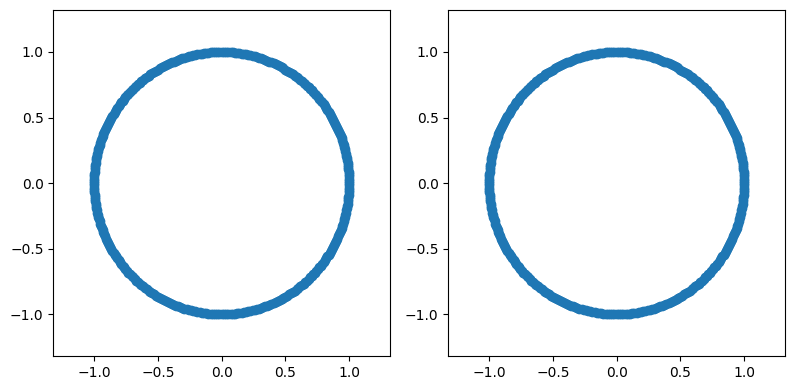

In [ ]:
# Ellipse
theta = np.deg2rad(np.arange(0.0, 360.0, 1.0))
x = np.sin(theta)
y = np.cos(theta)
points=np.array([x, y]).T

## Define Transformation
T=Tmatrix(scale=(1,1), rotationAngle=40, shearAngles=(0,0),translation=(0,0),elation=(0,0),reflection=(False,False))

## Apply trasformation
moved = applyTransformation(T, points=points)[0]

fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax1.scatter(points[:,0],points[:,1])
ax2.scatter(moved[:,0],moved[:,1])

minimum = np.min((ax1.get_xlim(),ax1.get_ylim(),ax2.get_xlim(),ax2.get_ylim()))
maximum = np.max((ax1.get_xlim(),ax1.get_ylim(),ax2.get_xlim(),ax2.get_ylim()))

ax1.set_xlim(minimum*1.2,maximum*1.2)
ax1.set_ylim(minimum*1.2,maximum*1.2)
ax2.set_xlim(minimum*1.2,maximum*1.2)
ax2.set_ylim(minimum*1.2,maximum*1.2)

fig.tight_layout()
plt.show()


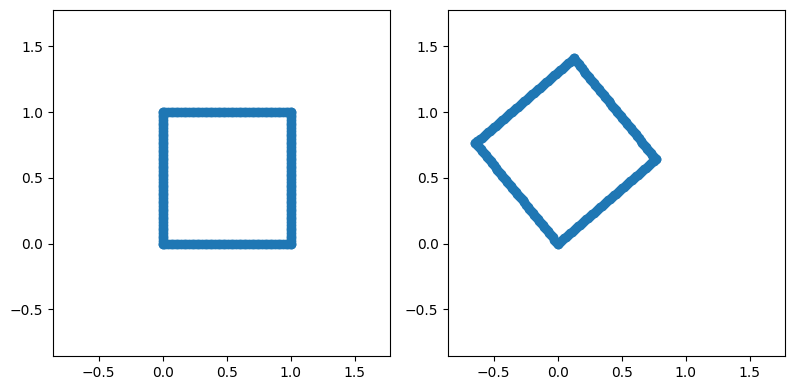

In [12]:
corners_x = [0, 1, 1, 0, 0]  # Closed square
corners_y = [0, 0, 1, 1, 0]
num_points = 50
x = []   # Closed square
y = []

for i in range(len(corners_x) - 1):  # Iterate over each edge
    x_start, x_end = corners_x[i], corners_x[i + 1]
    y_start, y_end = corners_y[i], corners_y[i + 1]
    x_edge = np.linspace(x_start, x_end, num_points)  # Evenly spaced points along x
    y_edge = np.linspace(y_start, y_end, num_points)  # Evenly spaced points along y
    x.extend(x_edge)
    y.extend(y_edge)
points=np.array([x,y]).T

## Define Transformation
T=Tmatrix(scale=(1,1), rotationAngle=40, shearAngles=(0,0),translation=(0,0),elation=(0,0),reflection=(False,False))

## Apply trasformation
moved = applyTransformation(T, points=points)[0]

fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax1.scatter(points[:,0],points[:,1])
ax2.scatter(moved[:,0],moved[:,1])

minimum = np.min((ax1.get_xlim(),ax1.get_ylim(),ax2.get_xlim(),ax2.get_ylim()))
maximum = np.max((ax1.get_xlim(),ax1.get_ylim(),ax2.get_xlim(),ax2.get_ylim()))

ax1.set_xlim(minimum*1.2,maximum*1.2)
ax1.set_ylim(minimum*1.2,maximum*1.2)
ax2.set_xlim(minimum*1.2,maximum*1.2)
ax2.set_ylim(minimum*1.2,maximum*1.2)

fig.tight_layout()
plt.show()

Different testes:

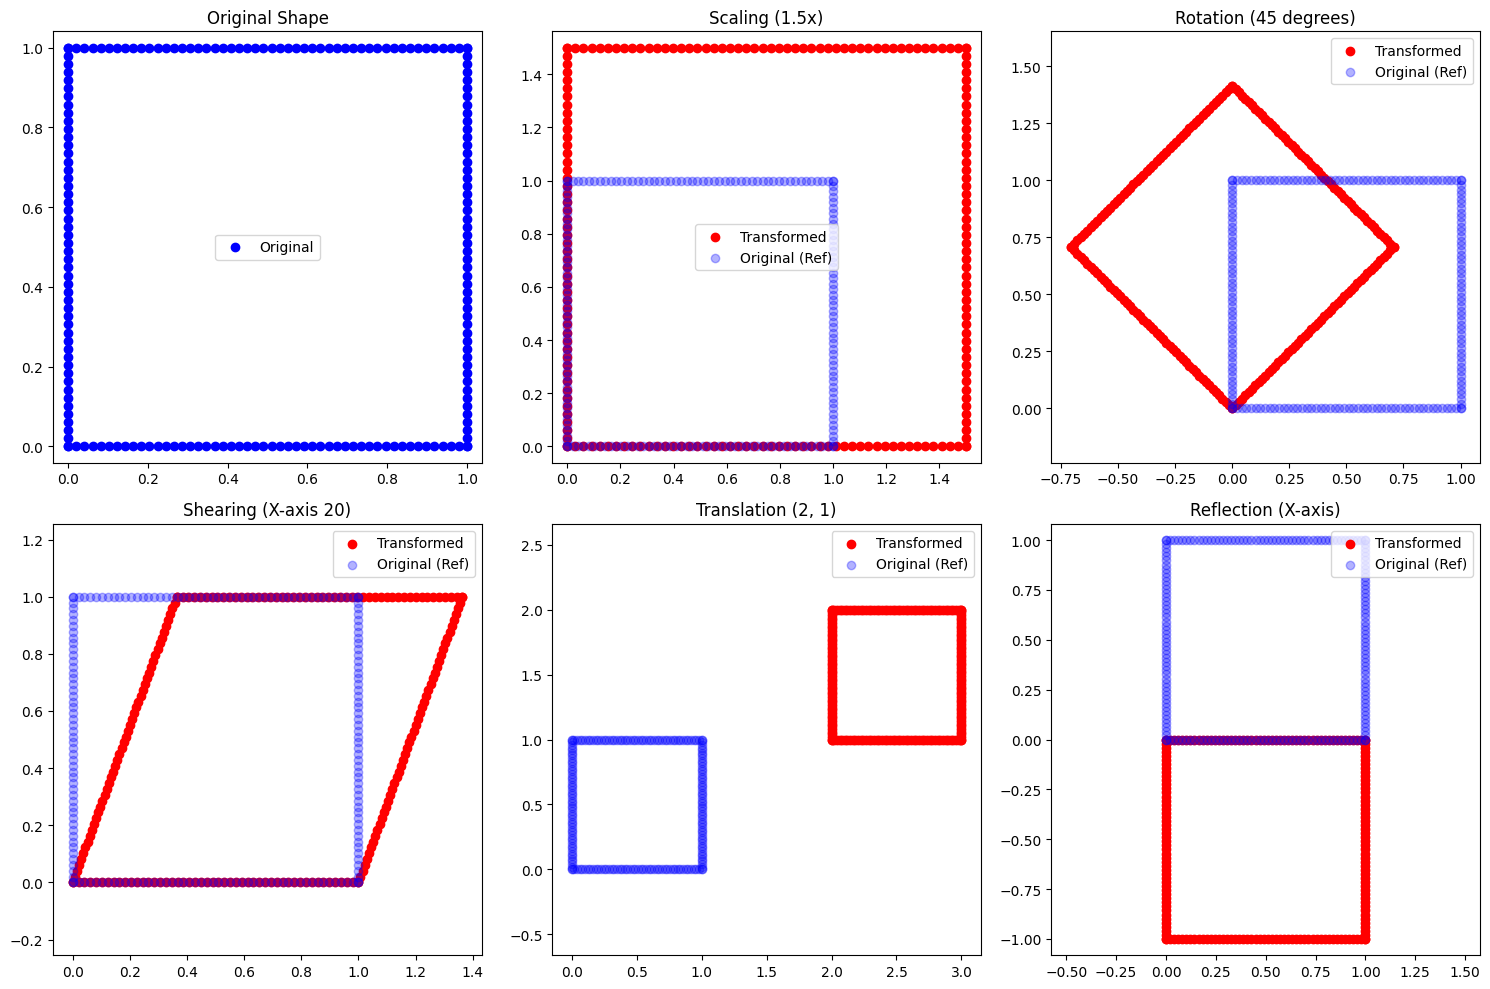

In [22]:
# Square will be used to see the different testes
# Building the square
corners_x = [0, 1, 1, 0, 0]  # Closed square
corners_y = [0, 0, 1, 1, 0]
num_points = 50
x = []   # Closed square
y = []

for i in range(len(corners_x) - 1):  # Iterate over each edge
    x_start, x_end = corners_x[i], corners_x[i + 1]
    y_start, y_end = corners_y[i], corners_y[i + 1]
    x_edge = np.linspace(x_start, x_end, num_points)  # Evenly spaced points along x
    y_edge = np.linspace(y_start, y_end, num_points)  # Evenly spaced points along y
    x.extend(x_edge)
    y.extend(y_edge)
points=np.array([x,y]).T

# deafault : scale=(1,1), rotationAngle=0, shearAngles=(0,0),translation=(0,0),elation=(0,0),reflection=(False,False)
# Define transformations
transformations = [
    {"scale": (1.5, 1.5), "rotation_angle": 0, "shear_angles": (0, 0), "translation": (0, 0), "reflection": (False, False), "title": "Scaling (1.5x)"},
    {"scale": (1, 1), "rotation_angle": 45, "shear_angles": (0, 0), "translation": (0, 0), "reflection": (False, False), "title": "Rotation (45 degrees)"},
    {"scale": (1, 1), "rotation_angle": 0, "shear_angles": (20, 0), "translation": (0, 0), "reflection": (False, False), "title": "Shearing (X-axis 20)"},
    {"scale": (1, 1), "rotation_angle": 0, "shear_angles": (0, 0), "translation": (2, 1), "reflection": (False, False), "title": "Translation (2, 1)"},
    {"scale": (1, 1), "rotation_angle": 0, "shear_angles": (0, 0), "translation": (0, 0), "reflection": (True, False), "title": "Reflection (X-axis)"}
]

# Create a grid of plots for all transformations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot the original shape in the first subplot
axes[0].scatter(points[:, 0], points[:, 1], c='blue', label="Original")
axes[0].set_title("Original Shape")
axes[0].axis("equal")
axes[0].legend()

# Apply transformations and plot each in the grid
for i, t in enumerate(transformations):
    T = Tmatrix(
        scale=t["scale"],
        rotationAngle=t["rotation_angle"],
        shearAngles=t["shear_angles"],
        translation=t["translation"],
        reflection=t["reflection"]
    )
    moved = applyTransformation(T, points=points)[0]

    # Plot transformed points
    ax = axes[i + 1]
    ax.scatter(moved[:, 0], moved[:, 1], c='red', label="Transformed")
    ax.scatter(points[:, 0], points[:, 1], c='blue', alpha=0.3, label="Original (Ref)")
    ax.set_title(t["title"])
    ax.axis("equal")
    ax.legend()

# Hide any unused subplots
for j in range(len(transformations) + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


Now, we can finally move to images. Here, you can load and plot the two images of your (or mine) right hand. Pixel intensities are normalized in order to be float between 0 and 1.

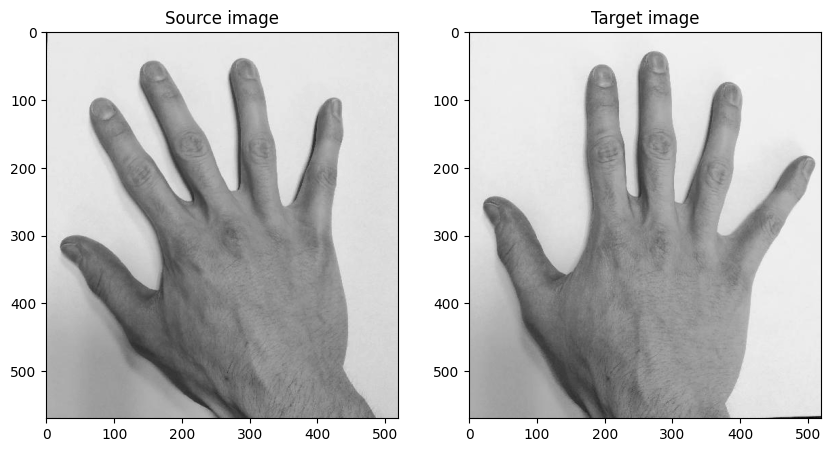

In [25]:
SourceIm = imread(workingDir + 'Source.jpg', as_gray=True)
SourceImNorm=(SourceIm - np.amin(SourceIm)) / (np.amax(SourceIm) - np.amin(SourceIm))
TargetIm = imread(workingDir + 'Target.jpg', as_gray=True)
TargetImNorm=(TargetIm - np.amin(TargetIm)) / (np.amax(TargetIm) - np.amin(TargetIm))

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.imshow(SourceImNorm, cmap='gray')
ax1.set_title('Source image')
ax2.imshow(TargetImNorm, cmap='gray')
ax2.set_title('Target image')
plt.show()


In the following function, you will code the forward warping technique with point splatting.

Theoretically, an image could be associated with a coordinate chart giving the real-world coordinates of each pixel. However, the problem becomes more difficult and in many applications we do not actually have this coordinate chart. Here, you will simply consider the coordinate of a pixel as its row and column position.

In the forward warping, as seen during the lecture of this morning, the coordinates of a pixel of a source image $I$ might not be warped exactly onto the output grid. When it falls within the grid, but not on the grid, we assign (ie splat) the pixel intensity of $I$ to the four neighbour 'corners' of the output grid.

These contributions must be weighted and for this reason a typical solution is to create an 'accumulator'. This is an array of the same size of the output grid which quantifies the number of contributions that each corner of the output grid has received. By simply dividing by the number of contributions (output grid ./ accumulator), we obtain at each corner of the output grid an averaged estimate of the intensity of the transformed image.

In [23]:
def ForwardWarping(I,T,coords=None,outputShape=None):
    '''
    Apply forward warping to an image I based on a transformation T.
    Transformation is defined by a 3x3 matrix T

    Inputs:
        I: image to transform
        T: 3x3 matrix trasformation
        coords: coordinates of the image. If None, the coordinates of a pixel
                are automatically its row and column position
        outputShape: defines the shape of the transformed image.
                     It can be 'None', same shape as the input image I or 'BB',
                     bounding box of the transformed image I_T,  or a tuple/numpy
                     array with 4 elements (min x, max x, min y, max y)

    Output:
        J: transformed image
    '''

    if coords is None:
      coords = np.mgrid[0:I.shape[0], 0:I.shape[1]] # coordinates of the image I
      cm = applyTransformation(T,coords=coords)[1]

      if outputShape is None:
          outputShape=(0,I.shape[0],0,I.shape[1])

      elif outputShape == 'BB':
          #Find extremities bounding box
          bx=int(np.floor(np.min(cm[0,:,:])))
          ux=int(np.ceil(np.max(cm[0,:,:])))
          by=int(np.floor(np.min(cm[1,:,:])))
          uy=int(np.ceil(np.max(cm[1,:,:])))
          outputShape=(bx,ux,by,uy)

      elif isinstance(outputShape, tuple):
          if len(outputShape) != 4:
              raise ValueError("Error ! outputShape should be of length 4")

      elif isinstance(outputShape, np.ndarray):
          if len(outputShape) != 4:
              raise ValueError("Error ! outputShape should be of length 4")
      else:
          raise ValueError("Error ! outputShape should be None, 'BB' or a tuple/numpy array with 4 elements")

      # XXXXXXXXXXXX
      J= np.zeros((outputShape[1]-outputShape[0],outputShape[3]-outputShape[2])) # transformed image
      acc= np.zeros(J.shape) # accumulator

      for i in range(I.shape[0]):
          for j in range(I.shape[1]):

              # transformed coordinate of a pixel
              p=cm[:,i,j]
              x=p[0]
              y=p[1]

              # Check if point is inside outputShape
              if outputShape[1]-1>x>outputShape[0] and outputShape[3]-1>y>outputShape[2]:
                  # translate if necessary, since output image will start from (0,0)
                  # it basically shifts transformed points in the positive quadrant
                  if outputShape[0]<0:
                      x=x+abs(outputShape[0])

                  if outputShape[2]<0:
                      y=y+abs(outputShape[2])

                  # Look for the four corners
                  # XXXXXXXXXXX
                  bottom = int(np.floor(y))
                  upper = int(np.ceil(y))
                  left = int(np.floor(x))
                  right = int(np.ceil(x))

                  bl=( left, bottom ) # bottom left
                  br=( right, bottom ) # bottom right
                  ul=( left, upper ) # up left
                  ur=( right, upper ) # up right

                  # Update J and acc
                  #XXXXXXXXXXXXXX
                  J[bl] += I[i,j]
                  J[br] += I[i,j]
                  J[ul] += I[i,j]
                  J[ur] += I[i,j]

                  acc[bl] += 1
                  acc[br] += 1
                  acc[ul] += 1
                  acc[ur] += 1

      acc[acc==0]=1
      J=np.divide(J,acc)

    else:
        raise ValueError("Error ! Still not implemented")

    return J

Let's test your implementation of the forward warping with the right hand image. Test with at least 5 different transformation matrices (try different configurations).

The transformation matrix T is:
 [[1.         1.         0.        ]
 [0.75355405 1.         0.        ]
 [0.         0.         1.        ]]


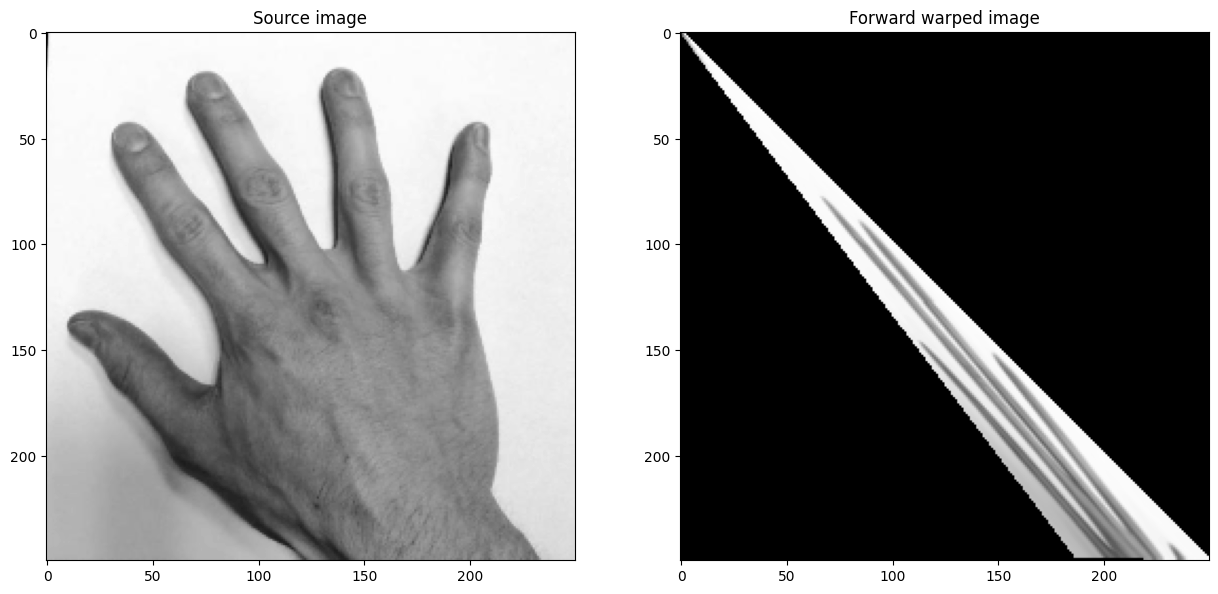

In [26]:
# Resize image (to make it faster...)
X= resize(SourceImNorm, (250,250), anti_aliasing=True)
T=Tmatrix(scale=(1,1), rotationAngle=0, shearAngles=(45,37),translation=(0,0),elation=(0,0),reflection=(False,False))
print('The transformation matrix T is:\n', T)

Xmf=ForwardWarping(X,T,outputShape=None)

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.imshow(X, cmap='gray')
ax1.set_title('Source image')
ax2.imshow(Xmf, cmap='gray')
ax2.set_title('Forward warped image')
plt.show()

Different testes:

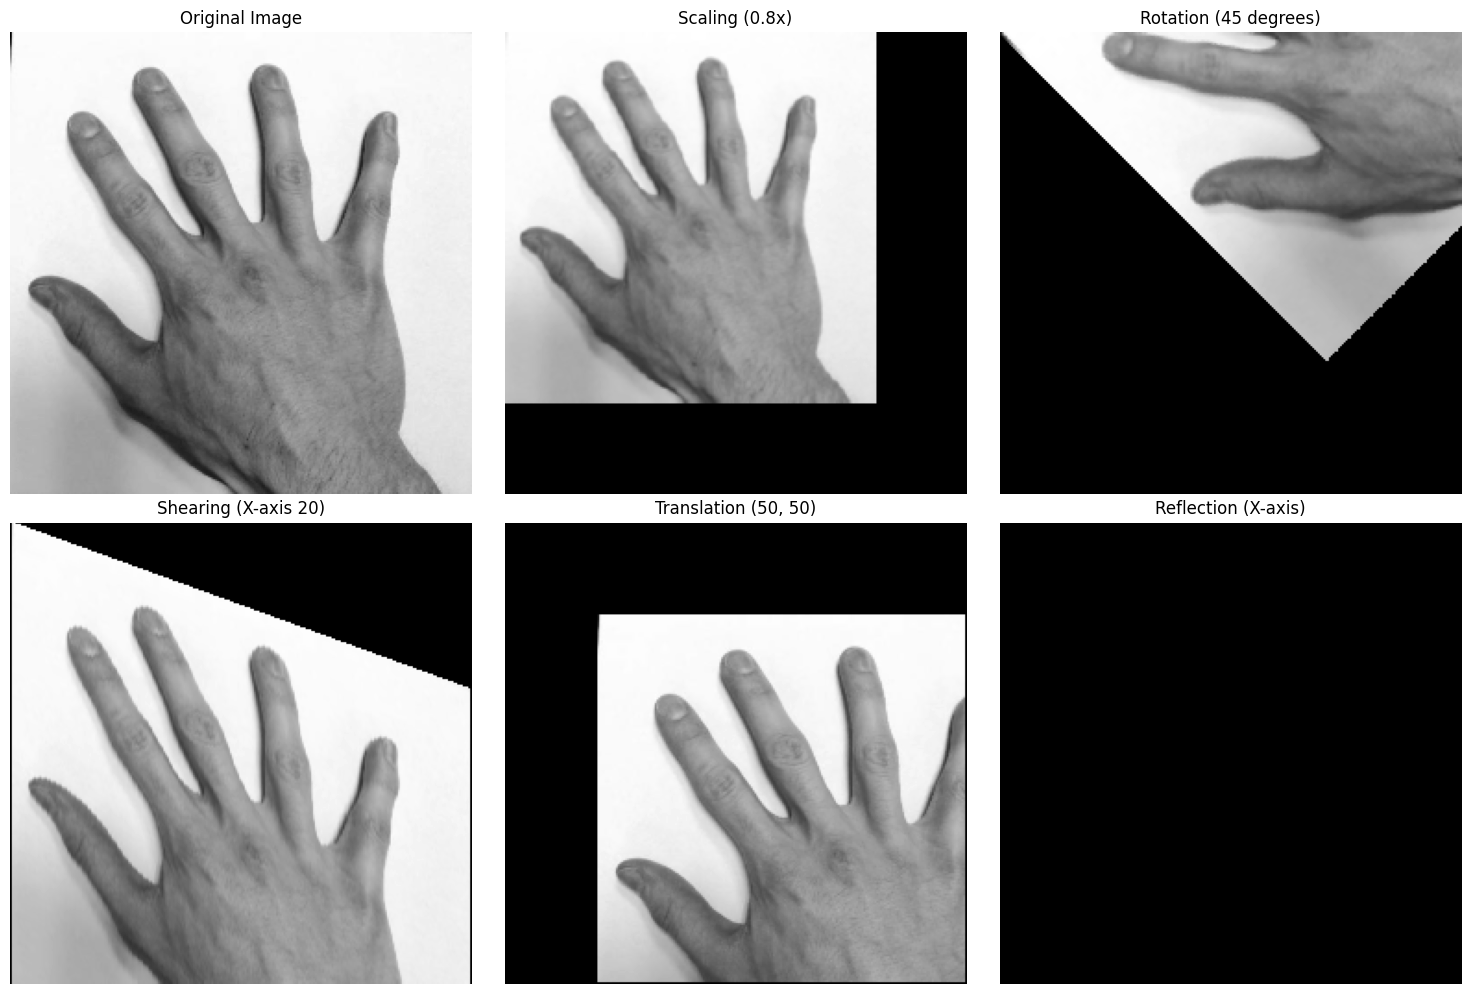

In [38]:
X = resize(SourceImNorm, (250, 250), anti_aliasing=True)

# Transformation configurations
transformations = [
    {"scale": (0.8, 0.8), "rotation_angle": 0, "shear_angles": (0, 0), "translation": (0, 0), "reflection": (False, False), "title": "Scaling (0.8x)"},
    {"scale": (1, 1), "rotation_angle": 45, "shear_angles": (0, 0), "translation": (0, 0), "reflection": (False, False), "title": "Rotation (45 degrees)"},
    {"scale": (1, 1), "rotation_angle": 0, "shear_angles": (20, 0), "translation": (0, 0), "reflection": (False, False), "title": "Shearing (X-axis 20)"},
    {"scale": (1, 1), "rotation_angle": 0, "shear_angles": (0, 0), "translation": (50, 50), "reflection": (False, False), "title": "Translation (50, 50)"},
    {"scale": (1, 1), "rotation_angle": 0, "shear_angles": (0, 0), "translation": (0, 0), "reflection": (True, False), "title": "Reflection (X-axis)"}
]

# Prepare a grid layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot original image in the first subplot
axes[0].imshow(X, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Apply transformations and plot
for i, t in enumerate(transformations):
    T = Tmatrix(
        scale=t["scale"],
        rotationAngle=t["rotation_angle"],
        shearAngles=t["shear_angles"],
        translation=t["translation"],
        reflection=t["reflection"]
    )
    Xmf = ForwardWarping(X, T,outputShape=None)

    ax = axes[i + 1]
    ax.imshow(Xmf, cmap='gray')
    ax.set_title(t["title"])
    ax.axis("off")

# Hide unused subplot
if len(transformations) + 1 < len(axes):
    for ax in axes[len(transformations) + 1:]:
        ax.axis("off")

plt.tight_layout()
plt.show()

Now, we can implement the Inverse Warping (what is usually used as seen this morning).

As before, you will not use external coordinates, the coordinates of a pixel will be its row and column position.

For the interpolation step, you will implement and use the nearest neighbour tehcnique but you can implement and use otherw (e.g. bilinear, cubic, etc.) if you wish.

In [34]:
def nearestNeighboutInterp(pM,I,coords=None):
    '''
    Nearest Neighbout interpolation

    Inputs:
        pM: 2D point defining the coordinates to interpolate
        I: image used for interpolation
        coords: coordinates of the image. If None, the coordinates of a pixel
                are automatically its row and column position

    Output:
        value: interpolated value at pM
    '''

    if coords is None:
        # row and column of pM
        r = int(np.round(pM[0])) #XXXXXXXXXXXXXX
        c = int(np.round(pM[1])) #XXXXXXXXXXXXXX

        # check if r and c are within the domain of I (I.shape)
        if I.shape[0]>r>=0 and I.shape[1]>c>=0:
                value = I[r,c] #XXXXXXXXXXXXXX
        else:
            value=0

    else:
        raise ValueError("Error ! Still not implemented")
        value=0

    return value

def InverseWarping(I,T,coords=None,outputShape=None):
    '''
    Apply inverse warping to an image I based on a transformation T.
    Transformation is defined by a 3x3 matrix

    Inputs:
        I: image to transform
        T: 3x3 matrix trasformation
        coords: coordinates of the image. If None, the coordinates of a pixel
                are automatically its row and column position
        outputShape: defines the shape of the transformed image.
                     It can be 'None', same shape as the input image I or 'BB',
                     bounding box of the transformed image I_T,  or a tuple/numpy
                     array with 4 elements (min x, max x, min y, max y)


    Output:
        J: transformed image
    '''

    if coords is None:

        if outputShape is None:
            outputShape=(0,I.shape[0],0,I.shape[1])

        elif outputShape == 'BB':
            coords = np.mgrid[0:I.shape[0], 0:I.shape[1]] # coordinates
            cm = applyTransformation(T,coords=coords)[1]
            #Find extremities bounding box
            bx=int(np.floor(np.min(cm[0,:,:])))
            ux=int(np.ceil(np.max(cm[0,:,:])))
            by=int(np.floor(np.min(cm[1,:,:])))
            uy=int(np.ceil(np.max(cm[1,:,:])))
            outputShape=(bx,ux,by,uy)

        elif isinstance(outputShape, tuple):
            if len(outputShape) != 4:
                raise ValueError("Error ! outputShape should be of length 4")

        elif isinstance(outputShape, np.ndarray):
            if len(outputShape) != 4:
                raise ValueError("Error ! outputShape should be of length 4")
        else:
            raise ValueError("Error ! outputShape should be None, 'BB' or a tuple/numpy array with 4 elements")

        # XXXXXXXXXXXXX
        J= np.zeros((outputShape[1]-outputShape[0],outputShape[3]-outputShape[2])) # transformed image

        for i in range(J.shape[0]):
            for j in range(J.shape[1]):

                p= np.array([i,j,1]) # coordinate of a pixel to transform
                pM = np.linalg.inv(T) @ p # transformed coordinate

                if pM[-1] != 0:
                  pM /= pM[-1] # normalization in case of homography

                  # shifting since the first pixel will be in (0,0) in the output image
                  if outputShape[0]<0:
                      x=i+abs(outputShape[0])
                  else:
                      x=i
                  if outputShape[2]<0:
                      y=j+abs(outputShape[2])
                  else:
                      y=j

                  J[x,y]=nearestNeighboutInterp(pM,I)

    else:
        raise ValueError("Error ! Still not implemented")

    return J

Let's test the inverse warping and compare it with the implementation of scipy. Test with at least 5 different transformation matrices (try different onfigurations).
Be careful, the implementation of scipy works only with affine transformations.
You can use other implementations from opencv or skimage (even for the projective transformations) if you want.

The transformation matrix T is:
 [[ 0.70710678  0.12339616 10.        ]
 [ 0.70710678  0.83050294 -5.        ]
 [ 0.          0.          1.        ]]


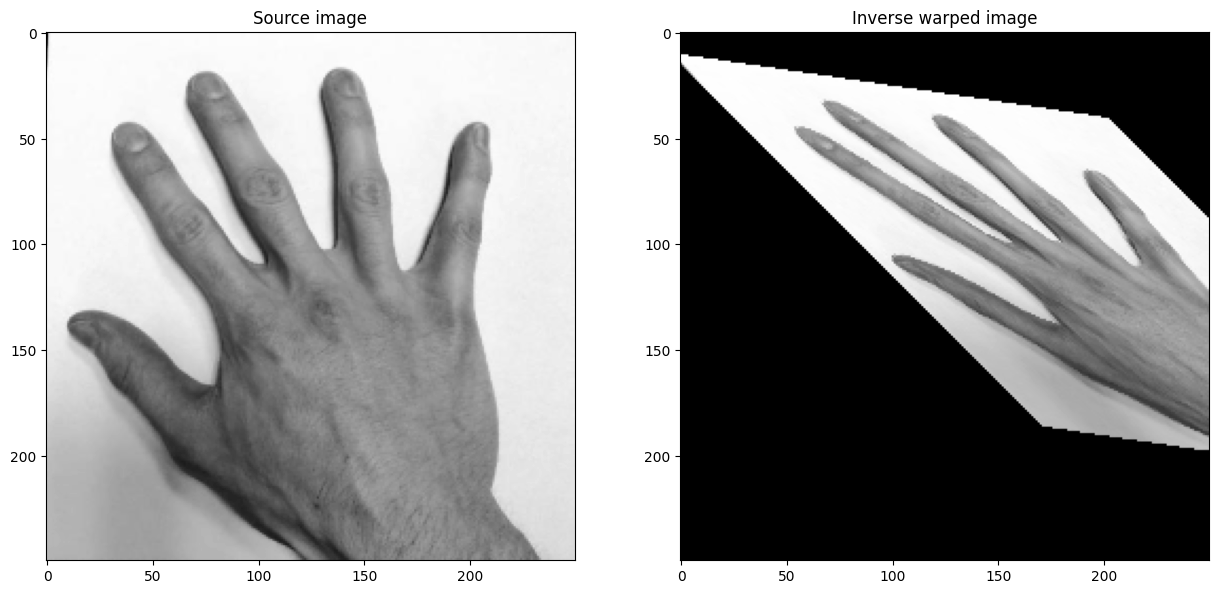

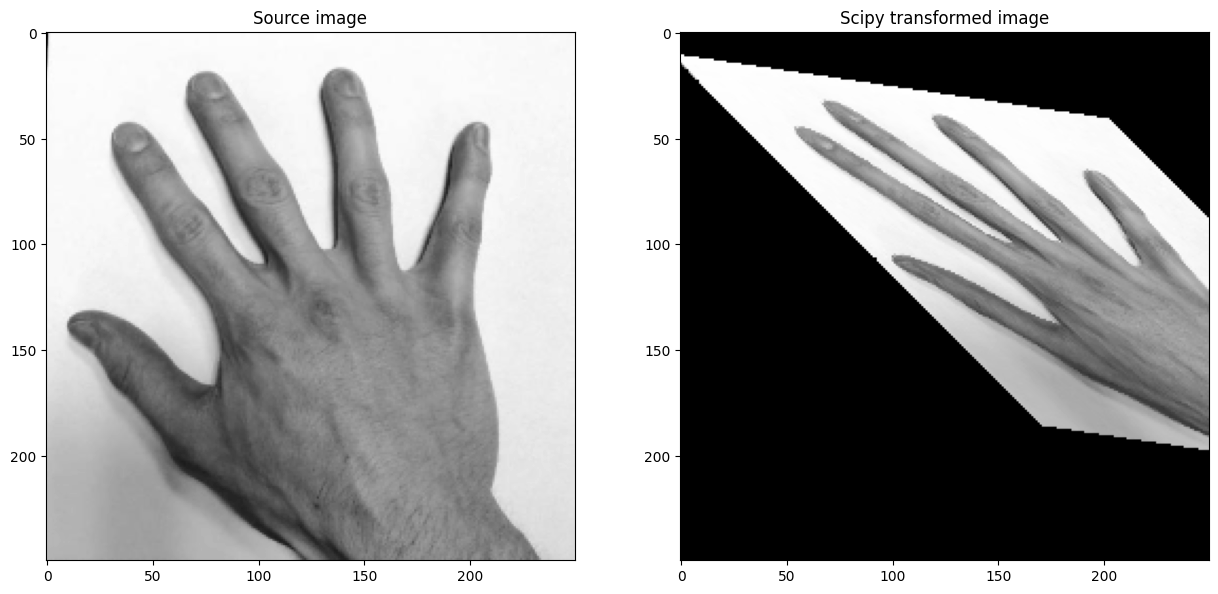

In [ ]:
T=Tmatrix(scale=(1,0.5), rotationAngle=45, shearAngles=(34,0),translation=(10,-5),elation=(0,0),reflection=(False,False))
print('The transformation matrix T is:\n', T)

Xmi=InverseWarping(X,T,outputShape=None)
#
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.imshow(X, cmap='gray')
ax1.set_title('Source image')
ax2.imshow(Xmi, cmap='gray')
ax2.set_title('Inverse warped image')
plt.show()



# Only for affine transformations
if T[2,0] ==0 and T[2,1] ==0:
  J=scipy.ndimage.affine_transform(X, LA.inv(T),order=0)
  fig = plt.figure(figsize=(15, 15))
  ax1 = plt.subplot(1, 2, 1)
  ax2 = plt.subplot(1, 2, 2)
  ax1.imshow(X, cmap='gray')
  ax1.set_title('Source image')
  ax2.imshow(J, cmap='gray')
  ax2.set_title('Scipy transformed image')
  plt.show()


Different testes:

The transformation matrix for Scale (1, 0.5), Rotate 45° is:
[[ 0.70710678  0.12339616 10.        ]
 [ 0.70710678  0.83050294 -5.        ]
 [ 0.          0.          1.        ]]
The transformation matrix for Scale (0.8x), Rotate 30° is:
[[  0.69282032  -0.4        -10.        ]
 [  0.4          0.69282032  10.        ]
 [  0.           0.           1.        ]]
The transformation matrix for Shear (X 0.5) is:
[[1.         0.00872687 0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]
The transformation matrix for Scale (1.2x), Translate is:
[[  1.2   0.   20. ]
 [  0.    1.2 -20. ]
 [  0.    0.    1. ]]
The transformation matrix for Reflection (X-axis) is:
[[ 1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]


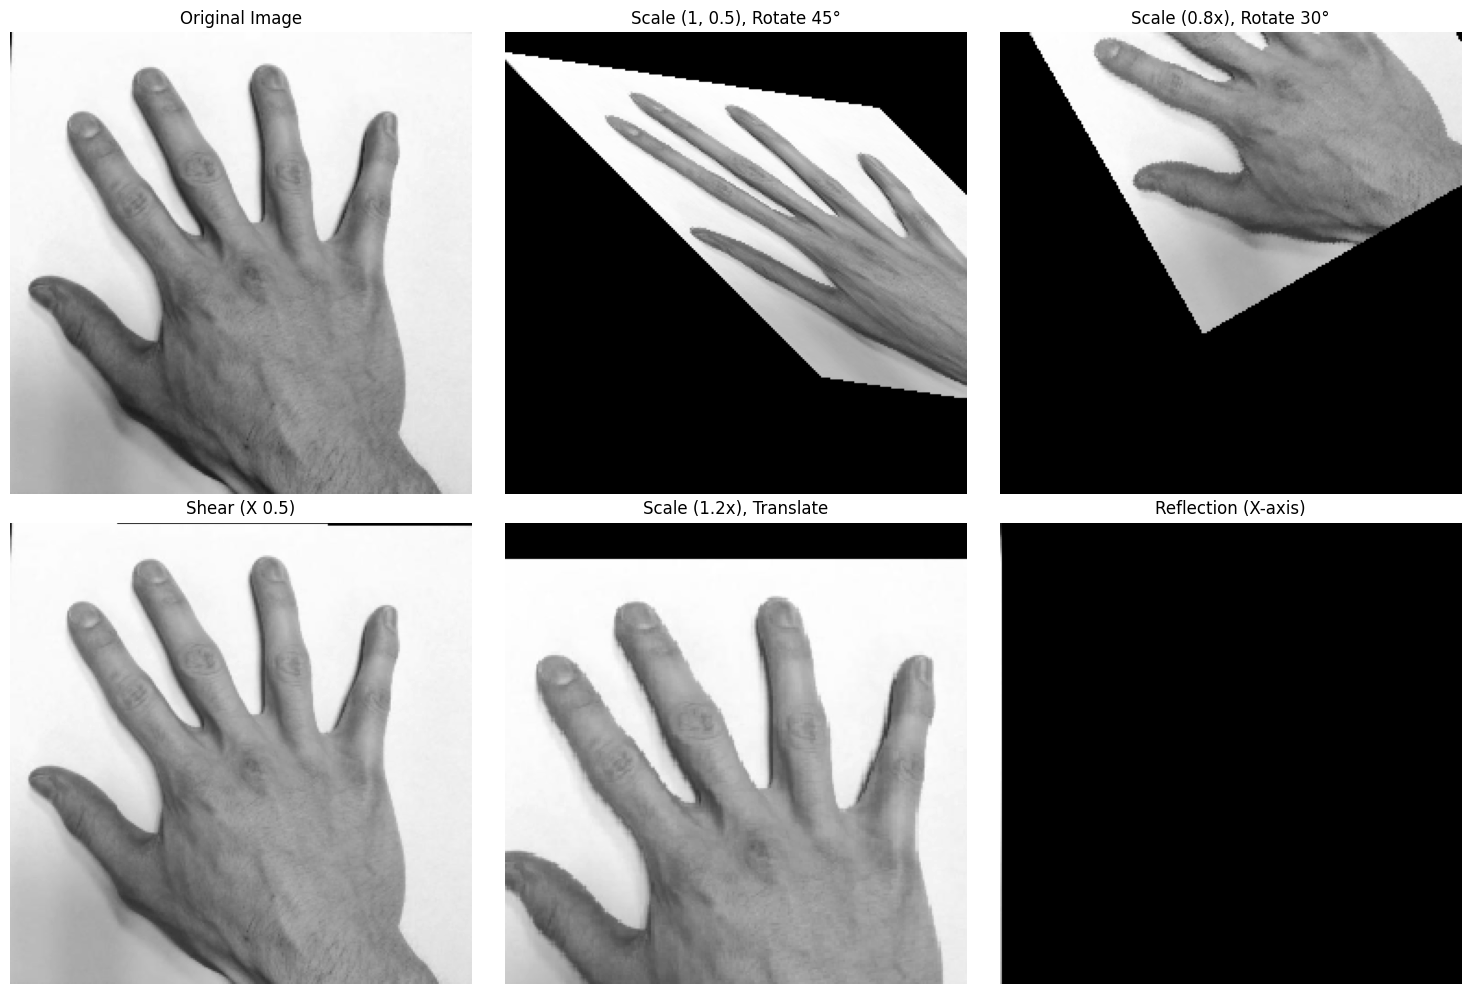

----------------------------------------------------------------------------------------


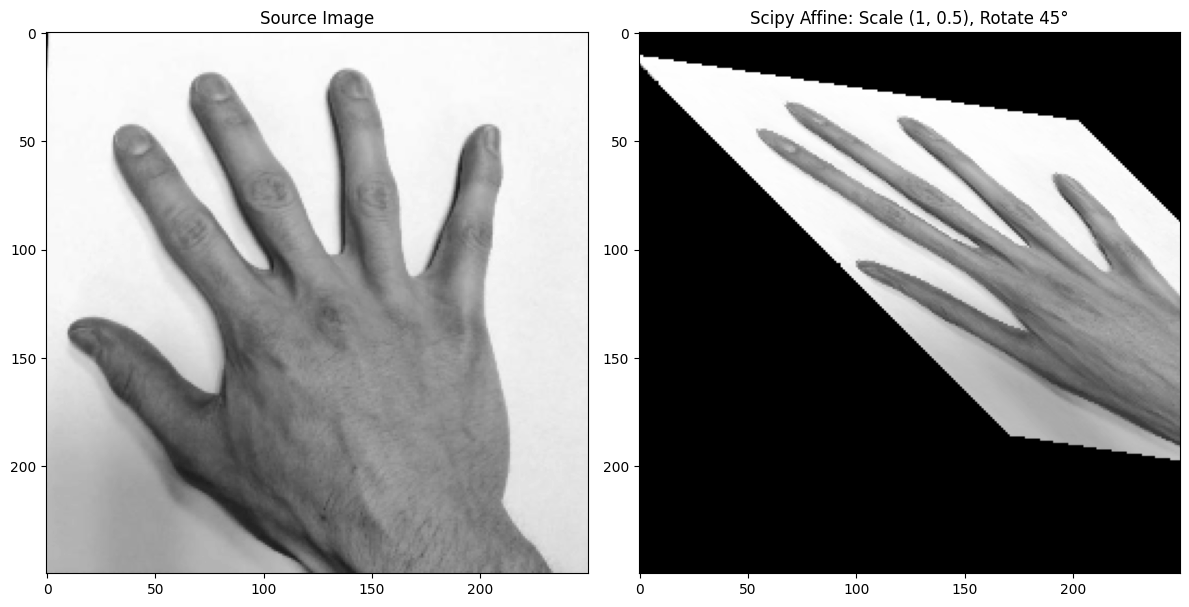

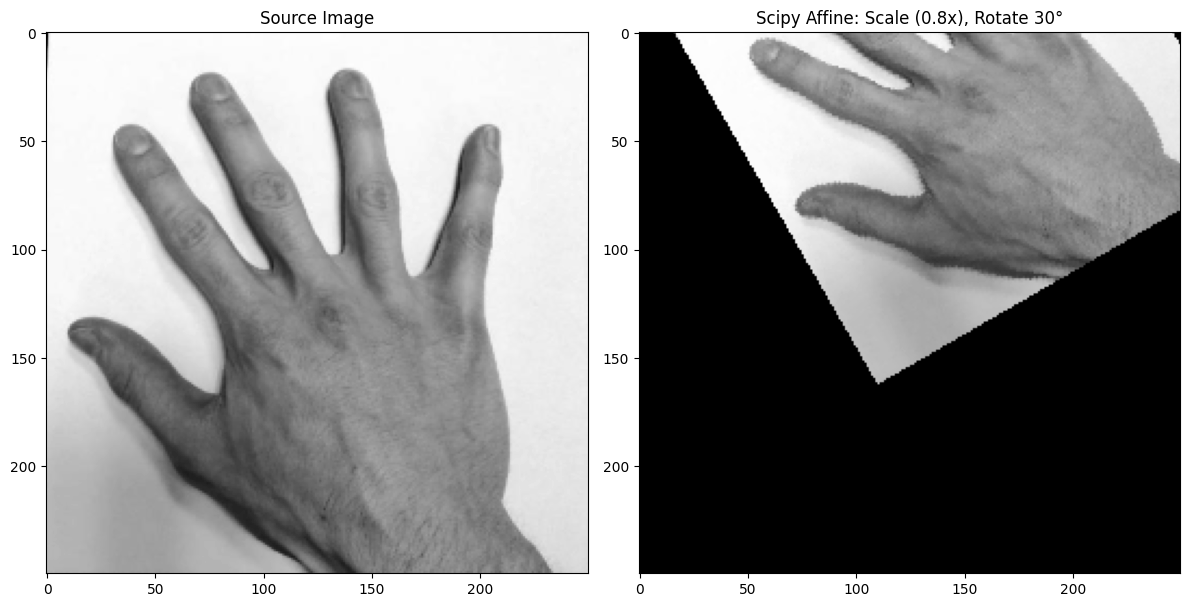

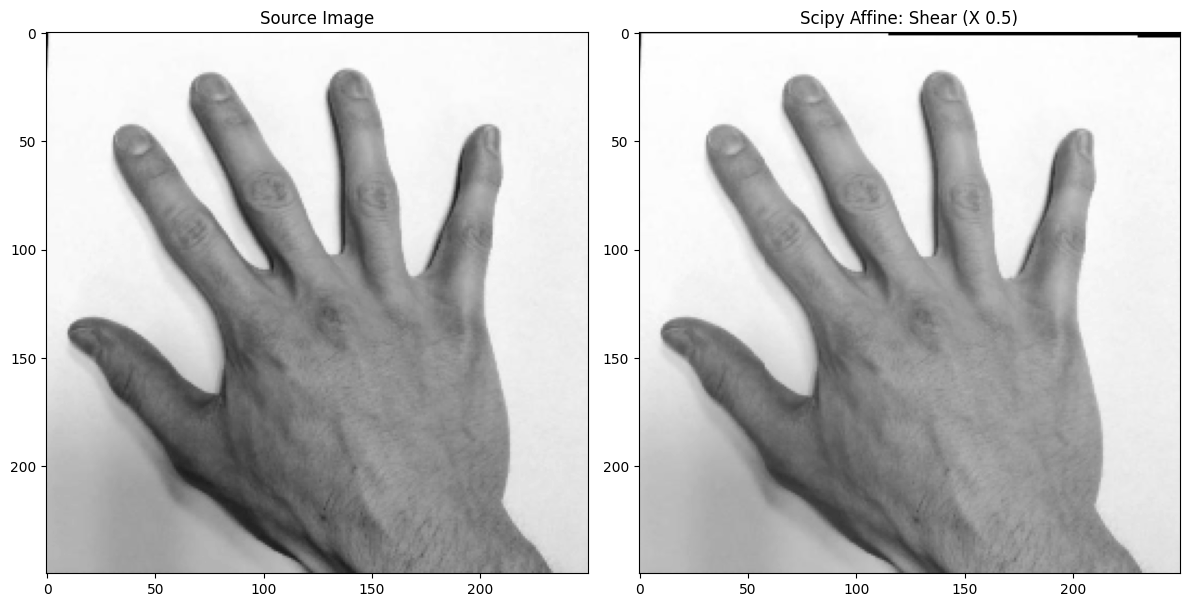

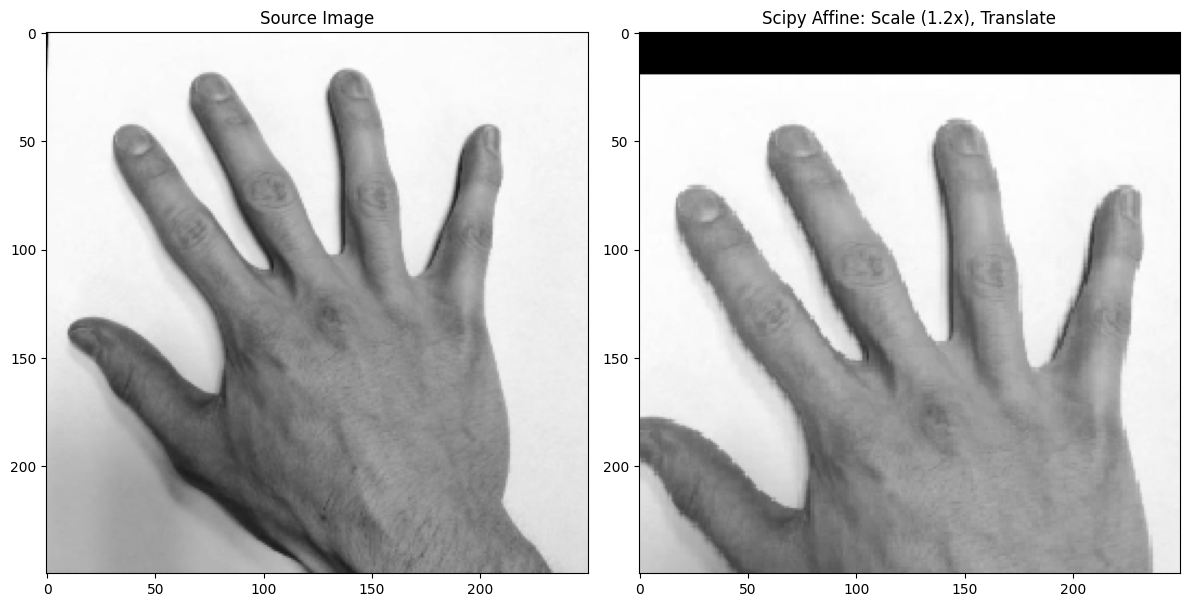

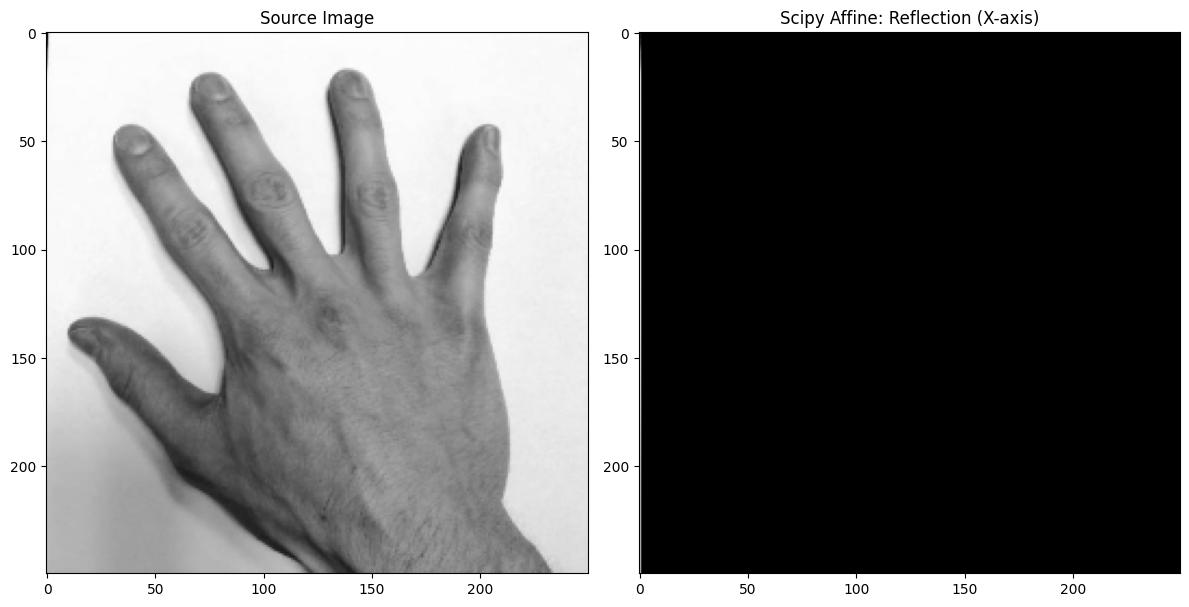

In [40]:
'''
T=Tmatrix(scale=(1,0.5), rotationAngle=45, shearAngles=(34,0),translation=(10,-5),elation=(0,0),reflection=(False,False))
print('The transformation matrix T is:\n', T)

Xmi=InverseWarping(X,T,outputShape=None)
#
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
ax1.imshow(X, cmap='gray')
ax1.set_title('Source image')
ax2.imshow(Xmi, cmap='gray')
ax2.set_title('Inverse warped image')
plt.show()

'''

# Transformation configurations
transformations = [
    {"scale": (1, 0.5), "rotation_angle": 45, "shear_angles": (34, 0), "translation": (10, -5), "reflection": (False, False), "title": "Scale (1, 0.5), Rotate 45°"},
    {"scale": (0.8, 0.8), "rotation_angle": 30, "shear_angles": (0, 0), "translation": (-10, 10), "reflection": (False, False), "title": "Scale (0.8x), Rotate 30°"},
    {"scale": (1, 1), "rotation_angle": 0, "shear_angles": (0.5, 0), "translation": (0, 0), "reflection": (False, False), "title": "Shear (X 0.5)"},
    {"scale": (1.2, 1.2), "rotation_angle": 0, "shear_angles": (0, 0), "translation": (20, -20), "reflection": (False, False), "title": "Scale (1.2x), Translate"},
    {"scale": (1, 1), "rotation_angle": 0, "shear_angles": (0, 0), "translation": (0, 0), "reflection": (True, False), "title": "Reflection (X-axis)"}
]

# Prepare a grid layout
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot original image in the first subplot
axes[0].imshow(X, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Apply transformations and plot
for i, t in enumerate(transformations):
    # Generate transformation matrix
    T = Tmatrix(
        scale=t["scale"],
        rotationAngle=t["rotation_angle"],
        shearAngles=t["shear_angles"],
        translation=t["translation"],
        reflection=t["reflection"]
    )
    print(f"The transformation matrix for {t['title']} is:\n{T}")

    # Apply inverse warping
    Xmi = InverseWarping(X, T, outputShape=None)

    # Plot the result
    ax = axes[i + 1]
    ax.imshow(Xmi, cmap='gray')
    ax.set_title(t["title"])
    ax.axis("off")

# Hide unused subplot
if len(transformations) + 1 < len(axes):
    for ax in axes[len(transformations) + 1:]:
        ax.axis("off")

plt.tight_layout()
plt.show()
print('----------------------------------------------------------------------------------------')

# Test affine_transform with scipy for affine-compatible matrices
for t in transformations:
    T = Tmatrix(
        scale=t["scale"],
        rotationAngle=t["rotation_angle"],
        shearAngles=t["shear_angles"],
        translation=t["translation"],
        reflection=t["reflection"]
    )
    '''
    # Only for affine transformations
    if T[2,0] ==0 and T[2,1] ==0:
      J=scipy.ndimage.affine_transform(X, LA.inv(T),order=0)
      fig = plt.figure(figsize=(15, 15))
      ax1 = plt.subplot(1, 2, 1)
      ax2 = plt.subplot(1, 2, 2)
      ax1.imshow(X, cmap='gray')
      ax1.set_title('Source image')
      ax2.imshow(J, cmap='gray')
      ax2.set_title('Scipy transformed image')
      plt.show()
    '''
    if T[2, 0] == 0 and T[2, 1] == 0:  # Only for affine transformations
        # affine_mat = T[:2, :2]
        # translation_vec = T[:2, 2]
        # scipy_warped = affine_transform(X, inv(affine_mat), offset=-np.dot(inv(affine_mat), translation_vec), order=1)
        J=scipy.ndimage.affine_transform(X, LA.inv(T),order=0)

        # Display results for scipy affine transform
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].imshow(X, cmap='gray')
        ax[0].set_title("Source Image")
        ax[1].imshow(J, cmap='gray')
        ax[1].set_title(f"Scipy Affine: {t['title']}")
        plt.tight_layout()
        plt.show()

**(OPTIONAL)** Implement the Lucas-Kanade Algorithm to register the source image to the target image.

Estimated affine parameters: [ 0.00844204 -0.08453463 -0.02085135  0.03620546  3.74278669 -3.06823081]


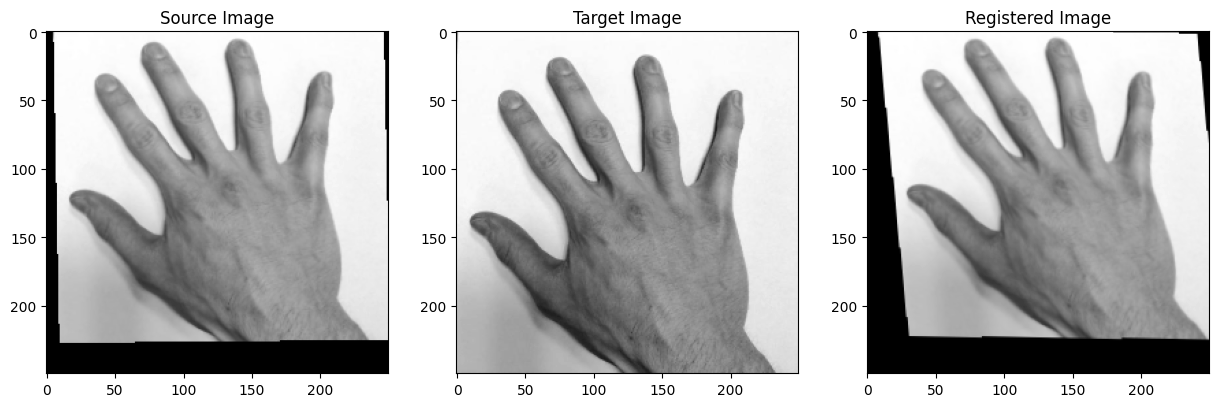

In [44]:
def compute_image_gradients(image):
    """Compute image gradients along the x and y directions."""
    grad_x = scipy.ndimage.sobel(image, axis=1)  # Gradient along x
    grad_y = scipy.ndimage.sobel(image, axis=0)  # Gradient along y
    return grad_x, grad_y

def warp_image(image, affine_params):
    """Apply affine transformation to the image."""
    affine_matrix = np.array([
        [1 + affine_params[0], affine_params[2], affine_params[4]],
        [affine_params[1], 1 + affine_params[3], affine_params[5]]
    ])
    return scipy.ndimage.affine_transform(image, affine_matrix, offset=0, order=1, mode='constant', cval=0)

def lucas_kanade(source, target, max_iterations=50, epsilon=1e-5):
    """Lucas-Kanade algorithm to register the source image to the target image."""
    # Initialize affine parameters [a, b, c, d, e, f] (6 DOF for affine transform)
    params = np.zeros(6)

    # Compute gradients of the target image
    grad_x, grad_y = compute_image_gradients(target)

    # Flatten target and gradients
    target_flat = target.ravel()
    grad_x_flat = grad_x.ravel()
    grad_y_flat = grad_y.ravel()

    # Generate grid coordinates
    rows, cols = target.shape
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    coords = np.stack([X.ravel(), Y.ravel(), np.ones_like(X.ravel())], axis=1)

    for iteration in range(max_iterations):
        # Warp source image with current affine parameters
        warped_source = warp_image(source, params)
        warped_source_flat = warped_source.ravel()

        # Compute the error image
        error = target_flat - warped_source_flat

        # Compute the Jacobian matrix
        warp_x = grad_x_flat * coords[:, 0]
        warp_y = grad_y_flat * coords[:, 0]
        warp_jacobian = np.stack([
            warp_x,  # dI/dx * x
            warp_y,  # dI/dy * x
            grad_x_flat * coords[:, 1],  # dI/dx * y
            grad_y_flat * coords[:, 1],  # dI/dy * y
            grad_x_flat,  # dI/dx
            grad_y_flat   # dI/dy
        ], axis=1)

        # Compute the Hessian matrix
        H = warp_jacobian.T @ warp_jacobian

        # Compute the parameter update
        delta_params = np.linalg.inv(H) @ (warp_jacobian.T @ error)
        params += delta_params

        # Check for convergence
        if np.linalg.norm(delta_params) < epsilon:
            print(f"Converged after {iteration + 1} iterations.")
            break

    return params

# Test the Lucas-Kanade algorithm
def test_lucas_kanade(target_image):
    # Create a transformed version of the target as the source
    affine_params = [0.05, -0.02, 0.01, 0.03, 10, -5]  # Example affine parameters
    source_image = warp_image(target_image, affine_params)

    # Apply Lucas-Kanade
    estimated_params = lucas_kanade(source_image, target_image)
    print("Estimated affine parameters:", estimated_params)

    # Warp source image using estimated parameters
    registered_image = warp_image(source_image, estimated_params)

    # Plot results
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(source_image, cmap='gray')
    axes[0].set_title("Source Image")
    axes[1].imshow(target_image, cmap='gray')
    axes[1].set_title("Target Image")
    axes[2].imshow(registered_image, cmap='gray')
    axes[2].set_title("Registered Image")
    plt.show()

# Run the test
test_lucas_kanade(X)
